<a href="https://colab.research.google.com/github/Um333r/Decision-Trees-Fraud_check/blob/master/Decision_Trees_Fraud_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Decision Trees Assignment**

**Data Set -** Fraud_check

1. Import Necessary libraries

In [51]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')


2. Import Data

In [52]:

fraud_details = pd.read_csv('/content/Fraud_check.csv')
fraud_details

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


3. Data Understanding

3.1 Initial Analysis :

In [53]:
fraud_details.head()


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [54]:
fraud_details.shape


(600, 6)

In [55]:
fraud_details.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [56]:
fraud_details.isna().sum()


Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [57]:
fraud_details.describe()



,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [58]:
fraud_details.dtypes


Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [59]:
fraud_details.columns


Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [60]:
fraud_details['Marital.Status'].value_counts()


Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

3.2 Correlation Matrix :


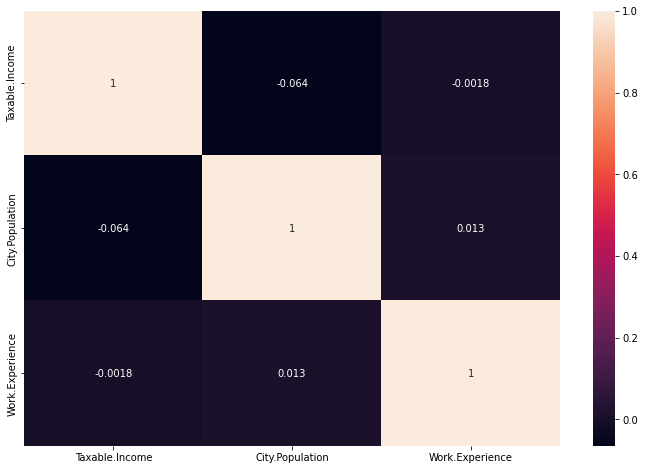

In [61]:
plt.figure(figsize = (12,8))
sns.heatmap(fraud_details.corr(),annot = True)
plt.show()

3.3 Label Encoder :


In [62]:
from sklearn import preprocessing


In [63]:
label_encoder = preprocessing.LabelEncoder()
label_encoder

LabelEncoder()

In [64]:
fraud_details['Undergrad'] = label_encoder.fit_transform(fraud_details['Undergrad'])
fraud_details['Marital.Status'] = label_encoder.fit_transform(fraud_details['Marital.Status'])
fraud_details['Urban'] = label_encoder.fit_transform(fraud_details['Urban'])


In [65]:
fraud_details


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


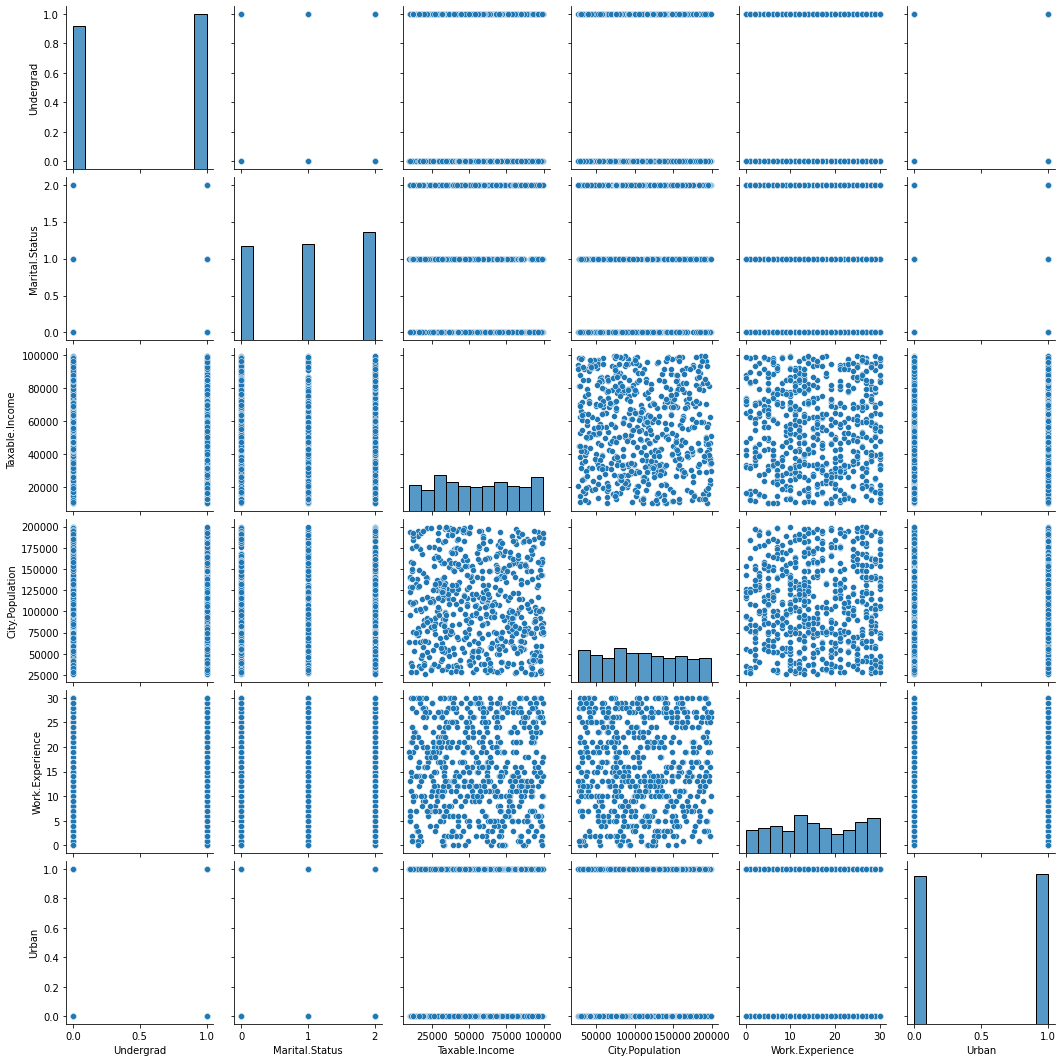

In [66]:
sns.pairplot(fraud_details)
plt.show()


3.4 Adding New Column :


In [67]:
fraud_details['Status'] = fraud_details['Taxable.Income'].apply(lambda Income: 'Risky' if Income <= 30000 else 'Good')
fraud_details

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [68]:
fraud_details['Status'].unique()


array(['Good', 'Risky'], dtype=object)

In [69]:
fraud_details['Status'] = label_encoder.fit_transform(fraud_details['Status'])
fraud_details


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Status
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


4. Train Test Split


In [70]:
from sklearn.model_selection import train_test_split


In [71]:
x = fraud_details.iloc[:,0:4]
y = fraud_details['Status']

In [72]:





y


0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Status, Length: 600, dtype: int64

In [73]:
fraud_details['Status'].unique()


array([0, 1])

In [74]:
fraud_details.Status.value_counts()


0    476
1    124
Name: Status, dtype: int64

In [75]:
list(fraud_details.columns)


['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Status']

In [76]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2 , random_state = 40) 


5. Building Model for Decision Tree Classifier using Entropy Criteria

In [77]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [78]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

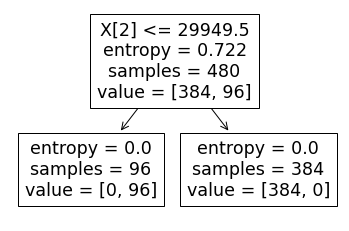

In [79]:
tree.plot_tree(model);  


In [80]:
f_n = ['Undergrad','Marital.Status','Taxable.Income','City.Population']
c_n = ['Good', 'Risky']


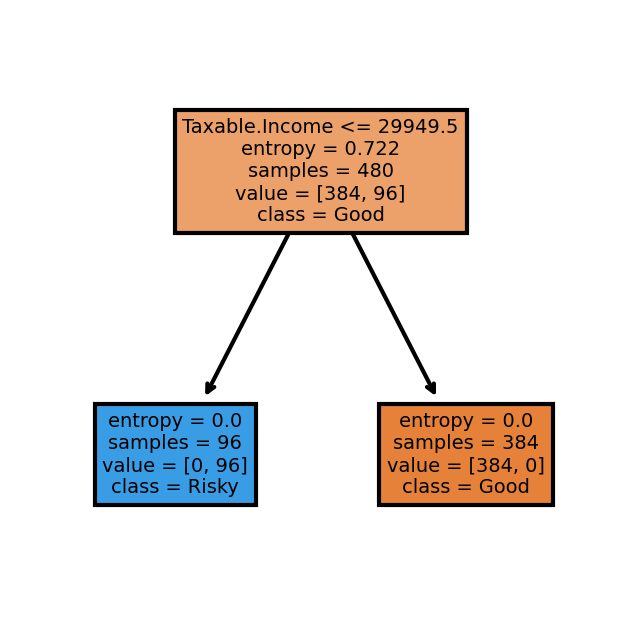

In [81]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2.5,2.5), dpi = 300)
tree.plot_tree(model,feature_names = f_n,class_names = c_n,filled = True);

5.1 Predicting on Test Data

In [82]:
pred = model.predict(x_test)                 
pd.Series(pred).value_counts()  


0    92
1    28
dtype: int64

In [83]:
pred


array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [84]:
pd.crosstab(y_test,pred)


col_0,0,1
Status,,
0,92,0
1,0,28


In [85]:
np.mean(pred == y_test) 


1.0

5.2 Feature Importance

In [86]:
model.feature_importances_ 


array([0., 0., 1., 0.])

In [87]:
feature_imp = pd.Series(model.feature_importances_,index = f_n).sort_values(ascending = False) 
feature_imp

Taxable.Income     1.0
Undergrad          0.0
Marital.Status     0.0
City.Population    0.0
dtype: float64

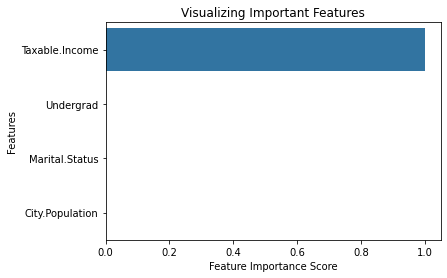

In [88]:
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

6. Building Model For Decision Tree Classifier (CART) using Gini Criteria

In [89]:
model_1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
model_1.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

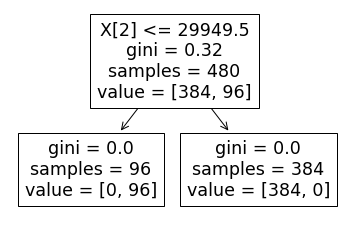

In [90]:
tree.plot_tree(model_1); 


In [91]:
f_n = ['Undergrad','Marital.Status','Taxable.Income','City.Population']
c_n = ['Good', 'Risky']

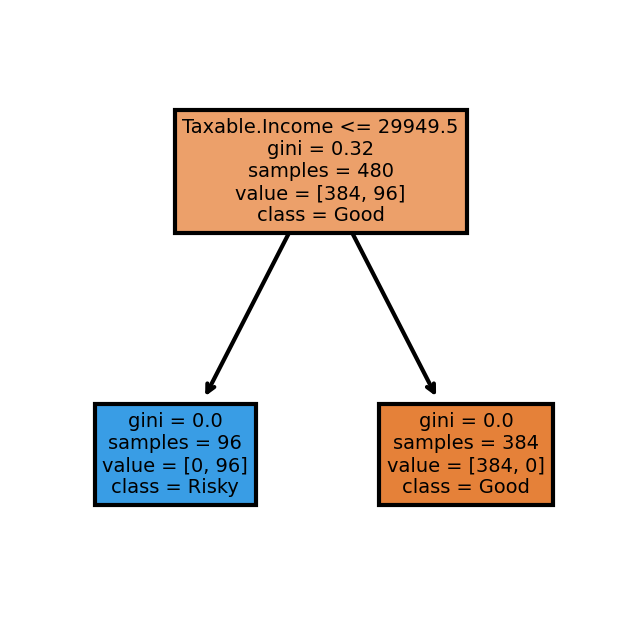

In [92]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2.5,2.5), dpi = 300)
tree.plot_tree(model_1,feature_names = f_n,class_names = c_n,filled = True);

6.1 Predicting on Test Data


In [93]:
pred_1 = model_1.predict(x_test)                 
pd.Series(pred_1).value_counts()  

0    92
1    28
dtype: int64

In [94]:
pred_1


array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [95]:
pd.crosstab(y_test,pred_1)


col_0,0,1
Status,,
0,92,0
1,0,28


In [96]:
np.mean(pred_1 == y_test) 


1.0

6.2 Feature Importance


In [97]:
model_1.feature_importances_


array([0., 0., 1., 0.])

In [98]:
feature_imp_1 = pd.Series(model_1.feature_importances_,index = f_n).sort_values(ascending = False) 
feature_imp_1

Taxable.Income     1.0
Undergrad          0.0
Marital.Status     0.0
City.Population    0.0
dtype: float64

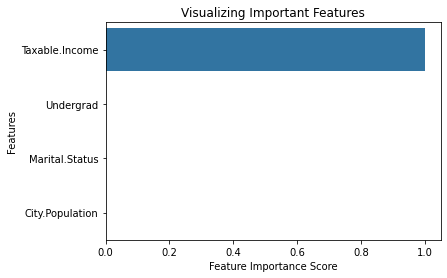

In [99]:
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

7. Decision Tree Regression


In [100]:
from sklearn.tree import DecisionTreeRegressor 


In [101]:
array = fraud_details.values
X = array[:,0:6]
y = array[:,3]

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)


In [103]:
model_3 = DecisionTreeRegressor()
model_3.fit(X_train, y_train)

DecisionTreeRegressor()

In [104]:
model_3.score(X_test,y_test) 


0.9998342979175675

**Conclusion :**

 Model Accuracy for Entropy Criteria :  1.0

 Model Accuracy for Gini Criteria    :  1.0
 
 Model Accuracy for Decision Tree Regression : 0.999